# Linear Regression Fundamentals

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from utils_common import generate_data

plt.style.use('ggplot')

A simple linear function

```math
y = wx + b
```

<span style="color : red">Band 5 & 6 students should be able to 'recall' this function and have a 'high level understanding' of it in Linear Regression</span>

| Symbol | |
| --- | --- |
| y | Predicted value |
| w | Slope of coefecient of the linear expression (weight) |
| x | Feature |
| b | y-intercept when the line crosses the y axis (bias) |


In [ ]:
x_train = np.array([[1.5], [4], [5], [8], [11]])
y_train = np.array([1, 3, 5, 7, 9])

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray (X,)): Data, X examples 
        w,b (scalar)    : model parameters  
    Returns
        f_wb (ndarray (y_pred,)): model prediction
    """
    X = x.shape[0]
    y_pred = np.zeros(X)
    for i in range(X):
        y_pred[i] = w * x[i].item() + b
    return y_pred

In [6]:
w = 1
b = -1

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(
    x_train,
    tmp_f_wb,
    c='b',
    label=f'Prediction: y = {w}x + {b}'
)

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Draw vertical lines to show the loss for each point
for xi, yi, y_pred in zip(x_train, y_train, tmp_f_wb):
    plt.plot([xi, xi], [yi, y_pred], c='green', linestyle='--', linewidth=1)
plt.plot([], [], c='green', linestyle='--', linewidth=1, label='loss')

# Draw "rise over run" triangle to illustrate the coefficient (slope)
x0 = x_train[0].item()  # starting x (e.g., 2)
run = 2                 # choose a run of 2 units
x1 = x0 + run           # ending x (e.g., 4)
y0 = w * x0 + b         # y at x0
y1 = w * x1 + b         # y at x1

# Draw the horizontal
plt.plot([x0, x1], [y0, y0], c='green', linewidth=2, label='coefficient (w)')

# Draw the vertical
plt.plot([x1, x1], [y0, y1], c='green', linewidth=2)
plt.annotate(f'coefficient (w={w})', xy=(x1, (y0 + y1)/2), xytext=(x1+0.2, (y0 + y1)/2),
             va='center', color='green')

# Mark the y-intercept on the y-axis
plt.scatter(0, b, color='green', s=100, zorder=5, label='y-intercept (b)')
plt.annotate(f'y-intercept (b={b})', xy=(0, b), xytext=(0.5, b+0.5),
             arrowprops=dict(facecolor='green', shrink=0.05), color='green')

# Set the title
plt.title("Linear Regression y=wx+b")
# Set the y-axis label
plt.ylabel('Target')
# Set the x-axis label
plt.xlabel('Feature')
plt.legend()
plt.show()

NameError: name 'compute_model_output' is not defined

#### Fit, Good Fit, Underfit & Overfit (also called intuition)

"Good fit" or "Intuition" refers to a model that accurately captures the underlying patterns in the data while avoiding overfitting and underfitting. Underfitting occurs when a model is too simple and fails to learn the relevant patterns in the data. Overfitting happens when a model learns the training data too well, including noise and outliers, and performs poorly on new, unseen data.

NameError: name 'compute_model_output' is not defined

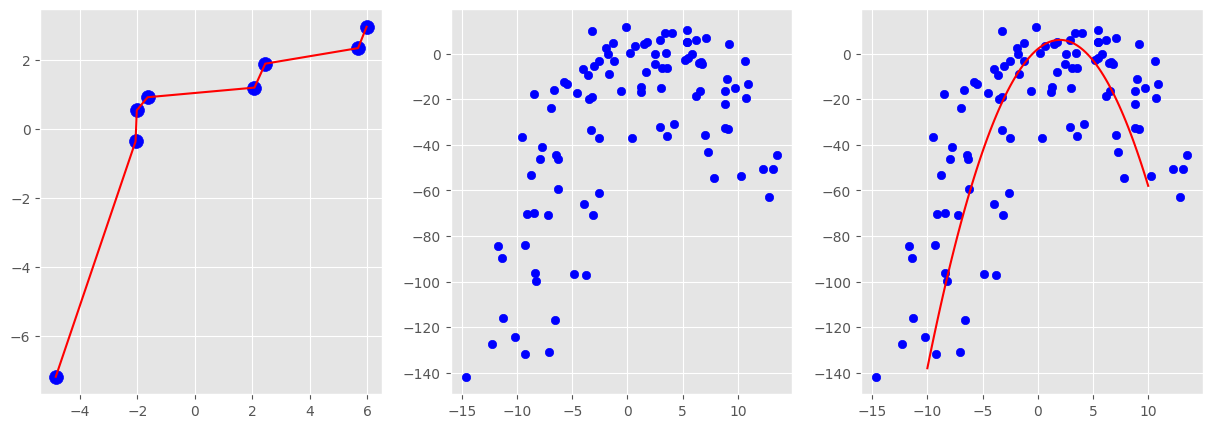

In [5]:
#Good Fit/Intuition with low bias and low variance
m = np.sort(generate_data(-10, 10, -10, 10, 8, 0.3))

fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].scatter(m[0], m[1], color='blue', s=100)
ax[0].plot(m[0], m[1], color='red')

x = np.linspace(10, -10, 100)
y = -x**2 + 4*x + 2  
ax[2].plot(x, y, color='red')
x = x + np.random.uniform(-5, 5, size=x.shape)
y = y + np.random.uniform(-10, 10, size=y.shape)
ax[1].scatter(x, y, c='b')
ax[2].scatter(x, y, c='b')

x_lin = np.array([-10,10])
tmp_f_wb = compute_model_output(x_lin, 10, -10,)
ax[1].plot(x_lin, tmp_f_wb, c='r')

ax[0].title.set_text("Overfitting")
ax[1].title.set_text("Underfitting")
ax[2].title.set_text("Good Fit/Intuition")
for ax in ax.flat:
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])

plt.show()

#### Fit Applied

In [ ]:
# Linear Relationship w Adjustable Correlation
data = generate_data(0, 50, 0, 50, 300, 0.8)

w = 0
b = 0

tmp_f_wb = compute_model_output(data[0], w, b,)

# Plot our model prediction
plt.plot(data[0], tmp_f_wb, c='r', label=f'Prediction: y = {w}x + {b}' )

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(data[0], data[1], color='blue')
plt.show()